# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [9]:
df=df.drop('User ID',axis=1)
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

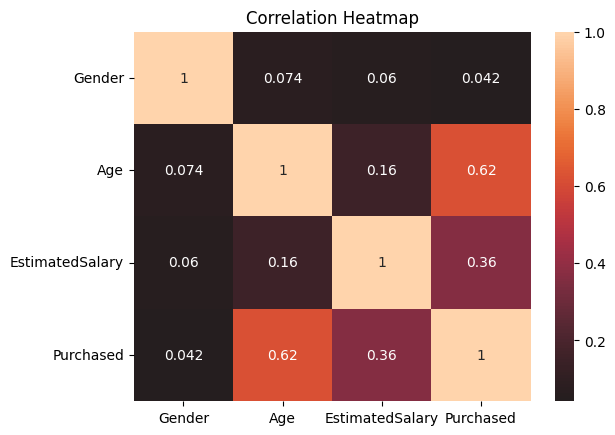

In [10]:
sns.heatmap(df.corr(),annot=True,center=0)
plt.title('Correlation Heatmap')
plt.show()

### Plot a countplot of gender with respect to purchased

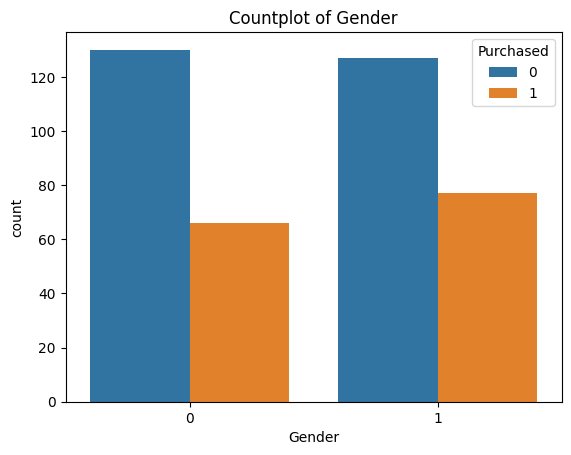

In [11]:
sns.countplot(x='Gender',hue='Purchased',data=df)
plt.title('Countplot of Gender')
plt.show()

### Plot a displot of Age

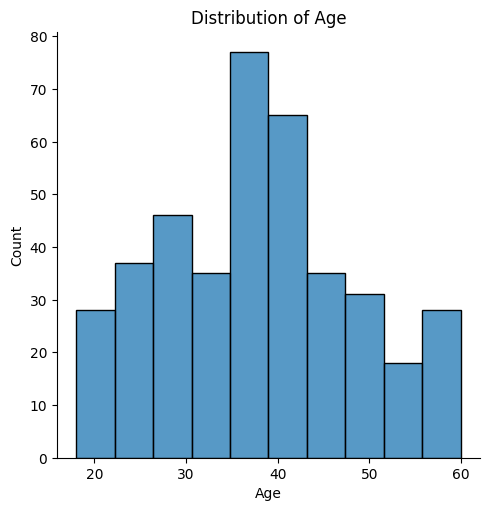

In [12]:
sns.displot(df['Age'])
plt.title('Distribution of Age')
plt.show()

### Plot pairplot of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

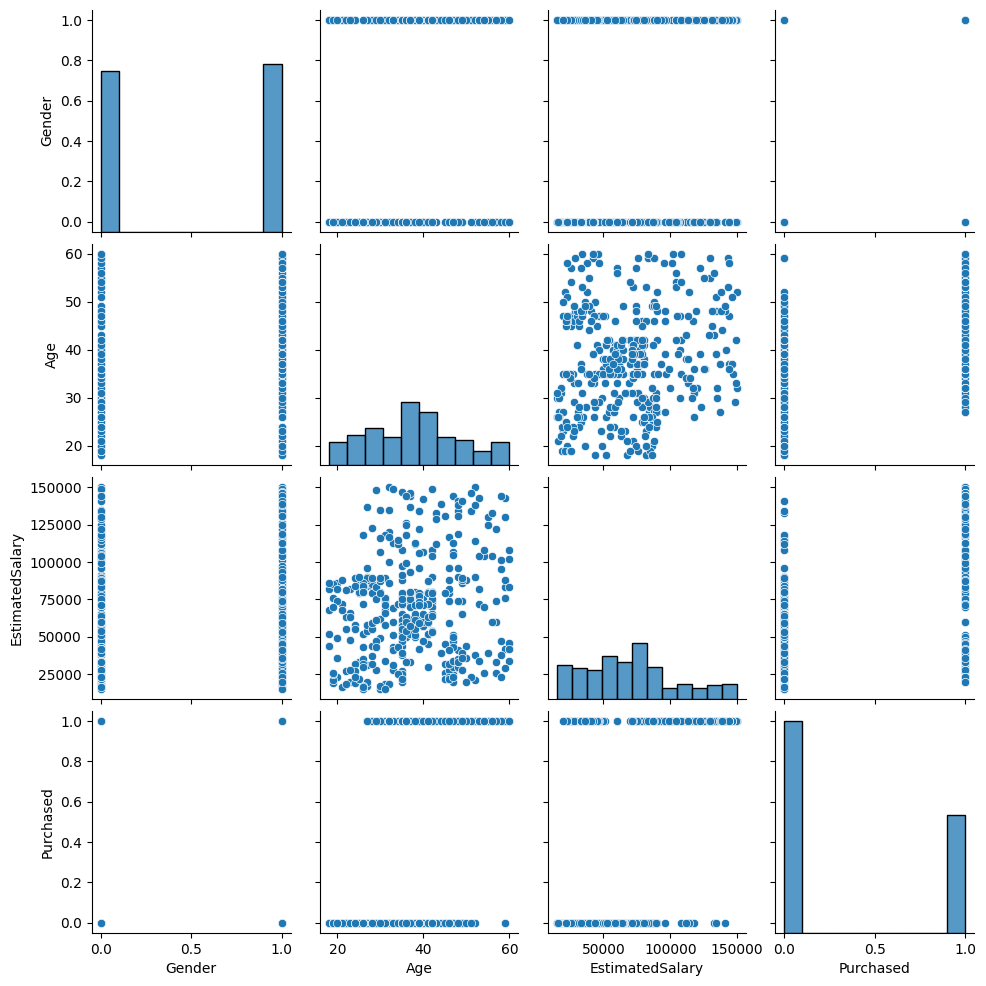

In [13]:
sns.pairplot(df)
plt.show

## Data Preprocessing

### Split the dataset into input and target variables

In [14]:
X=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

### Scale the data using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
X_scaled=scaler.fit_transform(X)

In [18]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


### Split the dataset into training and testing set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)


### Check shape of X_train and X_test

In [22]:
X_train.shape

(320, 3)

In [23]:
X_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [24]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [25]:
svc=LogisticRegression()

In [26]:
svc.fit(X_train,y_train)
svc

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred=svc.predict(X_test)

In [28]:
print("Score of our trained model is:",0.85)

Score of our trained model is: 0.85


In [29]:
metrics.accuracy_score(y_test,y_pred)

0.8875

In [30]:
metrics.confusion_matrix(y_test,y_pred)


array([[50,  2],
       [ 7, 21]])

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [32]:
print('Mean of cross validation score is:  0.8366666666666666')

Mean of cross validation score is:  0.8366666666666666


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
print("Accuaracy score of our prediction is:",0.91)

Accuaracy score of our prediction is: 0.91


In [35]:

metrics.confusion_matrix(y_test,y_pred)


array([[50,  2],
       [ 7, 21]])

In [36]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [37]:
print('Mean of Cross validation score is:  0.8899999999999999')

Mean of Cross validation score is:  0.8899999999999999


### Support Vector Machine

In [59]:
from sklearn.svm import SVC

In [60]:
svc_model=SVC()

In [61]:
svc_model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [63]:
import pickle
pickle_out=open('Customer_behaviour.pkl','wb')
pickle.dump(svc_model,pickle_out)
pickle_out.close()

In [64]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [41]:
print("Score of our trained model is :",0.903333333333)

Score of our trained model is : 0.903333333333


In [42]:
print('Accuarcy score of our prediction is:  0.92')

Accuarcy score of our prediction is:  0.92


In [43]:
metrics.confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]])

In [44]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [45]:
print('Mean of Cross validation score is:  0.9033333333333333')

Mean of Cross validation score is:  0.9033333333333333


### Assign cross val scores of all models into a dataframe

In [46]:
data = {
    'Models': ['Support Vector Machine', 'Random Forest',
               'Logistic Regression'],
    'Score': [0.90333, 0.89000, 0.83666]
}
df_scores = pd.DataFrame(data)
df_scores

,Models,Score
0,Support Vector Machine,0.90333
1,Random Forest,0.89000
2,Logistic Regression,0.83666


***

## Deploy the model with highest score using Tkinter

#### Import all modules from Tkinter

### Define a function that will output to an entry box in Tkinter

In [65]:
#imports
import numpy as np
import streamlit as st
import pickle

#load model
def load_model():
    try:
        with open("Customer_Behaviour.pkl", "rb") as file:
            model = pickle.load(file)

        scaler = None
        try:
            with open("scaler.pkl", "rb") as file:
                scaler = pickle.load(file)
        except:
            st.warning("Scaler not found or invalid")
            return model, scaler

    except FileNotFoundError:
        st.error("Model file not found")
        return None, None

    return model, scaler

model,scaler = load_model()

def genderInput(gender_input):
    if gender_input == "Male":
            return 0
    else:
        return 1

#convert predictions
def resultOutput(result):
    if result ==1:
        return "Yes"
    else:
        return "No"

def customer_satisfaction_prediction(gender_input,age_input,salary_input):
    try:
        gender_value= genderInput(gender_input)
        age_value =float(age_input)
        salary_value =float(salary_input)

        input_data =np.array([[gender_value,age_value,salary_value]])
        if scaler is None or not hasattr(scaler,'transform'):
            return"Error: Scaler not available or invalid"
        scaled_data =scaler.transform(input_data)

        prediction =model.predict(scaled_data)
        probabilities =model.predict_proba(scaled_data)
        predicted_purchase =int(prediction[0])

        confidence=probabilities[0][predicted_purchase] 

        return predicted_purchase, confidence 
    except Exception as e:
        return f"prediction Error:{e}",None
# Streamlit UI
def main():
    st.title("Customer Behaviour Prediction App")

    gender_input = st.selectbox("Select Gender", ['Male', 'Female'])
    age_input = st.number_input("Enter Age", min_value=18, max_value=100, value=30)
    salary_input = st.number_input("Enter Estimated Salary", min_value=0, value=50000, step=500)

    if st.button("Predict Customer Purchase"):
        if model is None:
            st.error("Model not loaded properly. Please check the file.")
            return

        result, confidence = customer_satisfaction_prediction(gender_input, age_input, salary_input)

        if isinstance(result, str) and (result.startswith("Error") or result.startswith("Prediction Error")):
            st.error(result)
        else:
            result_output = resultOutput(result)
            st.success(f"Will customer purchase? : {result_output}")
            if confidence is not None:
                st.info(f"Confidence: {confidence:.2%}")

if __name__ == "__main__":
    main()

2025-11-21 12:44:13.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 12:44:13.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

### Create Tkinter window with all necessary entryboxes and labels

***

# <span style = "color:green;font-size:40px"> Great Job! </span>